In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
# np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True)

In [2]:
# Path to your .mat file
mat_file_path = 'Data/s01.mat' 

mat = loadmat(
    mat_file_path,
    struct_as_record=False,   # access fields as attributes
    squeeze_me=True,          # drop trivial dimensions (so 1x1 -> scalar)
    simplify_cells=True       # convert MATLAB cell arrays to Python lists
)

In [3]:
print(mat["eeg"].keys())

dict_keys(['noise', 'rest', 'srate', 'movement_left', 'movement_right', 'movement_event', 'n_movement_trials', 'imagery_left', 'imagery_right', 'n_imagery_trials', 'frame', 'imagery_event', 'comment', 'subject', 'bad_trial_indices', 'psenloc', 'senloc'])


In [4]:
for key in mat["eeg"].keys():
    print(key)

noise
rest
srate
movement_left
movement_right
movement_event
n_movement_trials
imagery_left
imagery_right
n_imagery_trials
frame
imagery_event
comment
subject
bad_trial_indices
psenloc
senloc


In [5]:
eeg = mat["eeg"]
for key in eeg.keys():
    data = eeg[key]
    print("Key: ", key)
    print("Type: ", type(data))
    try:
        print("Shape: ", data.shape)
    except:
        print("No associated shape, Value -> ", data)
        
    print("n/n")
    

Key:  noise
Type:  <class 'numpy.ndarray'>
Shape:  (5,)
n/n
Key:  rest
Type:  <class 'numpy.ndarray'>
Shape:  (68, 34048)
n/n
Key:  srate
Type:  <class 'int'>
No associated shape, Value ->  512
n/n
Key:  movement_left
Type:  <class 'numpy.ndarray'>
Shape:  (68, 71680)
n/n
Key:  movement_right
Type:  <class 'numpy.ndarray'>
Shape:  (68, 71680)
n/n
Key:  movement_event
Type:  <class 'numpy.ndarray'>
Shape:  (71680,)
n/n
Key:  n_movement_trials
Type:  <class 'int'>
No associated shape, Value ->  20
n/n
Key:  imagery_left
Type:  <class 'numpy.ndarray'>
Shape:  (68, 358400)
n/n
Key:  imagery_right
Type:  <class 'numpy.ndarray'>
Shape:  (68, 358400)
n/n
Key:  n_imagery_trials
Type:  <class 'int'>
No associated shape, Value ->  100
n/n
Key:  frame
Type:  <class 'numpy.ndarray'>
Shape:  (2,)
n/n
Key:  imagery_event
Type:  <class 'numpy.ndarray'>
Shape:  (358400,)
n/n
Key:  comment
Type:  <class 'str'>
No associated shape, Value ->  bci2011v1 left/right motor imagery
n/n
Key:  subject
Type:  <c

In [6]:
print(eeg["comment"])
print(eeg["subject"])

bci2011v1 left/right motor imagery
subject 1


In [7]:
print(eeg["frame"])

[-2000  5000]


In [8]:
print(np.unique(eeg["imagery_event"]))

[0 1]


In [9]:
### Starting with Movement Left Data and exploring PSD ###


movement_left = eeg["movement_left"]
print("Original movement left shape: ", movement_left.shape)

fs = eeg["srate"]
movement_left_data = movement_left[:64, :]  # EEG channels only, drop the auxiliary channels
n_trials = eeg["n_movement_trials"]
samples_per_trial = movement_left_data.shape[1] // n_trials
movement_left_epochs = np.reshape(movement_left_data, (64, samples_per_trial, n_trials), order='F')
print(movement_left_epochs.shape)

Original movement left shape:  (68, 71680)
(64, 3584, 20)


In [10]:
print(movement_left_epochs[:5,:5,0])

[[  -9773.996   -9950.996  -10090.496   -9941.496  -10098.996]
 [-168767.25  -168754.5   -168889.75  -168742.25  -168829.   ]
 [-168224.25  -168037.5   -168162.75  -168323.75  -168639.5  ]
 [ 393200.5    393191.25   392958.     392815.     392680.25 ]
 [ 483607.25   483541.75   483300.     483150.75   483144.75 ]]


In [11]:
from scipy.signal import welch

movement_left_epoch = movement_left_epochs[0, :, 0]  # 1 channel, 1 trial, shape: (samples,)

f, Pxx = welch(movement_left_epoch, fs=fs, nperseg=fs*2)

In [12]:
print("frequency: ", f[:10])
print("Pxx: ", Pxx[:10])

frequency:  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Pxx:  [3.27999094e+05 9.60666562e+05 1.04702675e+06 7.51579375e+05
 4.64011000e+05 3.03348438e+05 1.82719875e+05 1.07683547e+05
 6.78772422e+04 4.89617148e+04]


In [13]:
mu_band = (8, 13)
band_mask = (f >= mu_band[0]) & (f <= mu_band[1])
mu_power = np.trapezoid(Pxx[band_mask], f[band_mask])

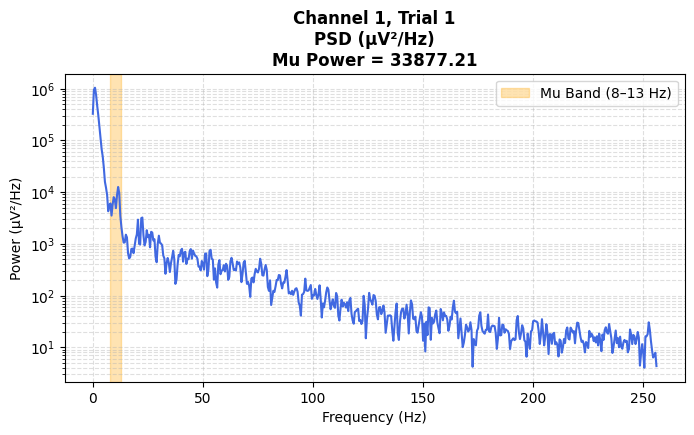

In [14]:
plt.figure(figsize=(8, 4))
plt.semilogy(f, Pxx, color='royalblue')
plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 1, Trial 1\nPSD (µV²/Hz)\nMu Power = {mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [15]:
movement_left_epoch = movement_left_epochs[13, :, 0]  # 1 channel, 1 trial, shape: (samples,)

f, Pxx = welch(movement_left_epoch, fs=fs, nperseg=fs*2)

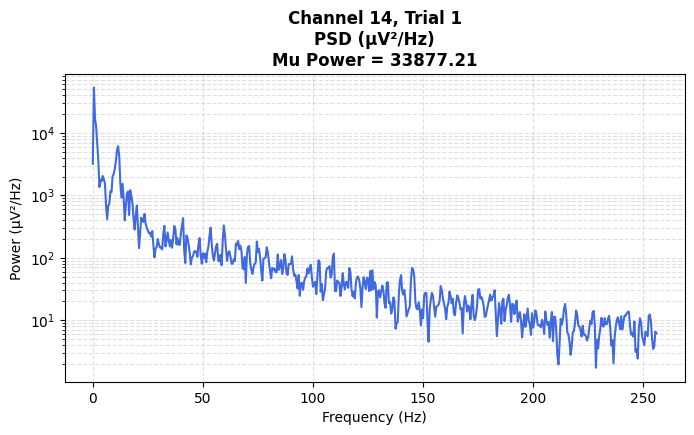

In [16]:
plt.figure(figsize=(8, 4))
plt.semilogy(f, Pxx, color='royalblue')
# plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 14, Trial 1\nPSD (µV²/Hz)\nMu Power = {mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [20]:
movement_events = eeg["movement_event"]
print(movement_events.shape)
print(movement_events.shape[0])

(71680,)
71680


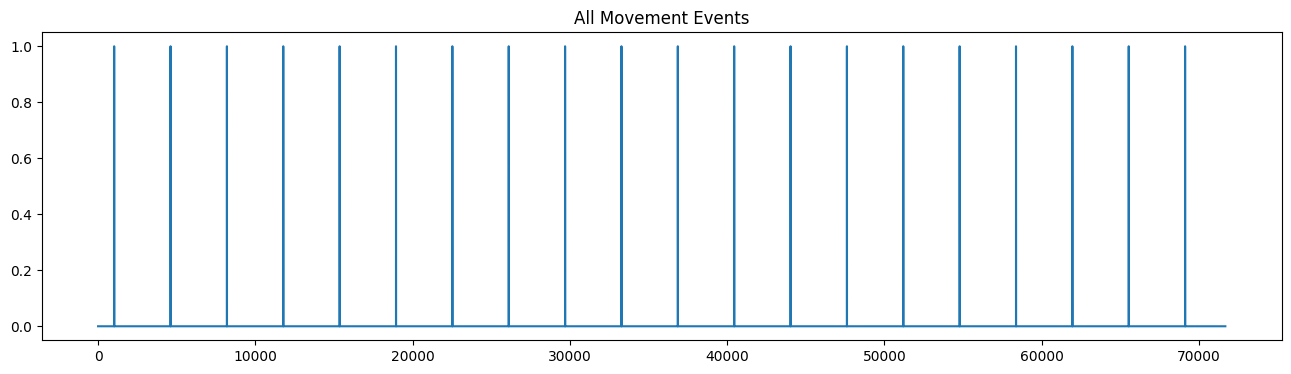

In [21]:
plt.figure(figsize=(16, 4))
plt.title("All Movement Events")
plt.plot(movement_events)
plt.show()

In [22]:
samples_per_trial = movement_events.shape[0] // n_trials
event_marker_epochs = np.reshape(movement_events, (1, samples_per_trial, n_trials), order='F')

In [23]:
print(event_marker_epochs.shape)

(1, 3584, 20)


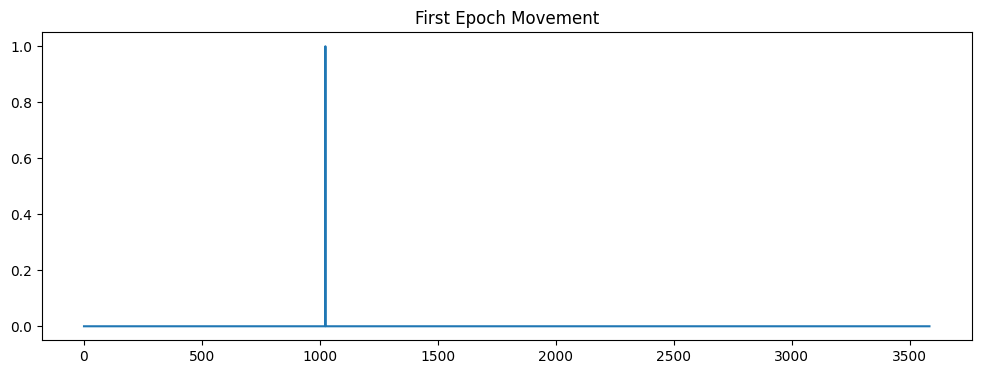

In [24]:
plt.figure(figsize=(12, 4))
plt.title("First Epoch Movement")
plt.plot(event_marker_epochs[0,:,0])
plt.show()

In [26]:
for n in range(event_marker_epochs.shape[2]):
    event_marker_epoch = event_marker_epochs[0,:,n]
    values, counts = np.unique(event_marker_epoch, return_counts=True)
    first_one_index = np.argmax(event_marker_epoch == 1)
    print("Values: ", values)
    print("Counts: ", counts)
    print("First 1 Index: ", first_one_index)
    print("/n/n")

Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values:  [0 1]
Counts:  [3583    1]
First 1 Index:  1023
/n/n
Values: 

Looks like the movement event happens at the exact same sample for every trial and is just a "start" indicator.

# Looking at PSD Before, During and After Movement Events.

Lets breakdown one of the existing epochs into 3 sections and look at how band power changes. Lets start with one electrode that is around the motor cortex (13) and once that is working expand out to more electrodes.

In [29]:
ch14_e1 = movement_left_epochs[13,:,0]
print(ch14_e1.shape)

(3584,)


In [31]:
# Movement event occurs at 1023, split into :512, 512:3000, 3000:
before = ch14_e1[:512]
during = ch14_e1[512:3000]
after = ch14_e1[3000:]

print("Before: ", before.shape)
print("During: ", during.shape)
print("After: ", after.shape)

Before:  (512,)
During:  (2488,)
After:  (584,)


In [55]:
# Full Epoch
full_f, full_Pxx = welch(ch14_e1, fs=fs, nperseg=min(fs*2, len(ch14_e1)))
full_mu_power = np.trapezoid(full_Pxx[band_mask], full_f[band_mask])

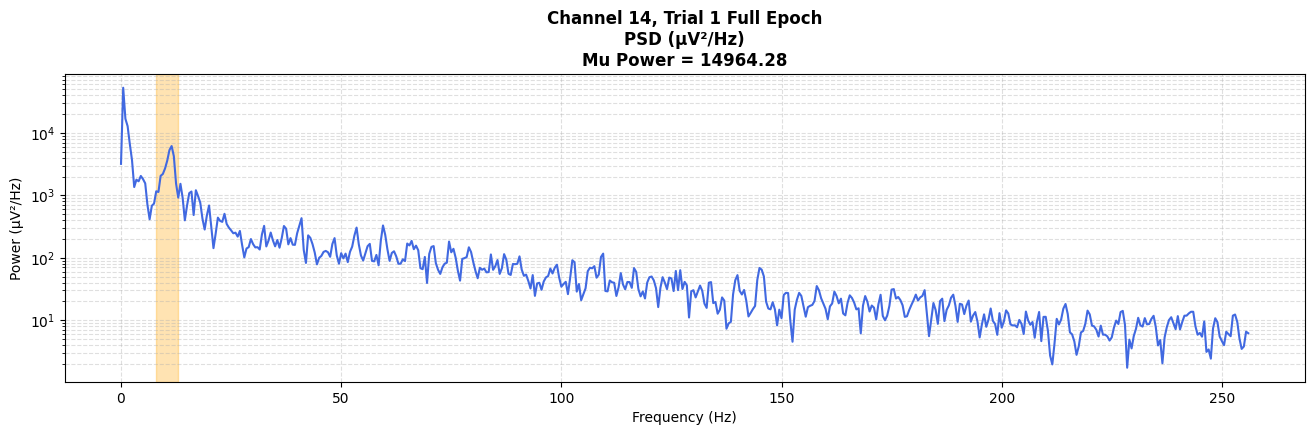

In [56]:
plt.figure(figsize=(16, 4))
plt.semilogy(full_f, full_Pxx, color='royalblue')
plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 14, Trial 1 Full Epoch\nPSD (µV²/Hz)\nMu Power = {full_mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [59]:
# Before the movement
before_f, before_Pxx = welch(before, fs=fs, nperseg=min(fs*2, len(before)))
before_mu_power = np.trapezoid(before_Pxx[band_mask], before_f[band_mask])

/var/folders/78/21sjthg97dz0k8kh6jfc0qfc0000gn/T/ipykernel_19839/2982437538.py:2: UserWarning: nperseg=1024 is greater than signal length max(len(x), len(y)) = 512, using nperseg = 512
  before_f, before_Pxx = welch(before, fs=fs, nperseg=fs*2)


IndexError: boolean index did not match indexed array along axis 0; size of axis is 257 but size of corresponding boolean axis is 513

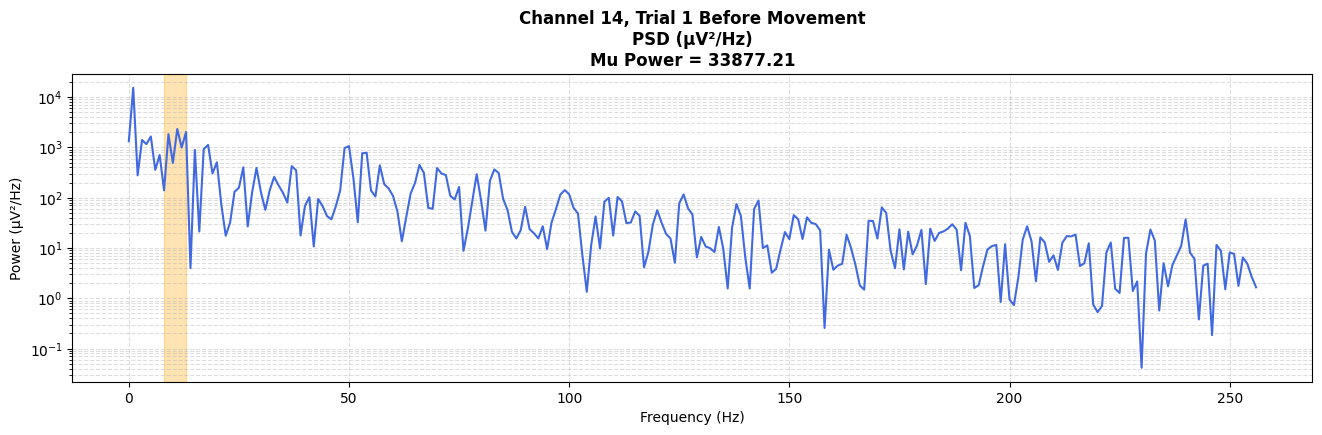

In [37]:
plt.figure(figsize=(16, 4))
plt.semilogy(before_f, before_Pxx, color='royalblue')
plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 14, Trial 1 Before Movement\nPSD (µV²/Hz)\nMu Power = {mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [52]:
during_f, during_Pxx = welch(during, fs=fs, nperseg=fs*2)
during_mu_power = np.trapezoid(during_Pxx[band_mask], during_f[band_mask])

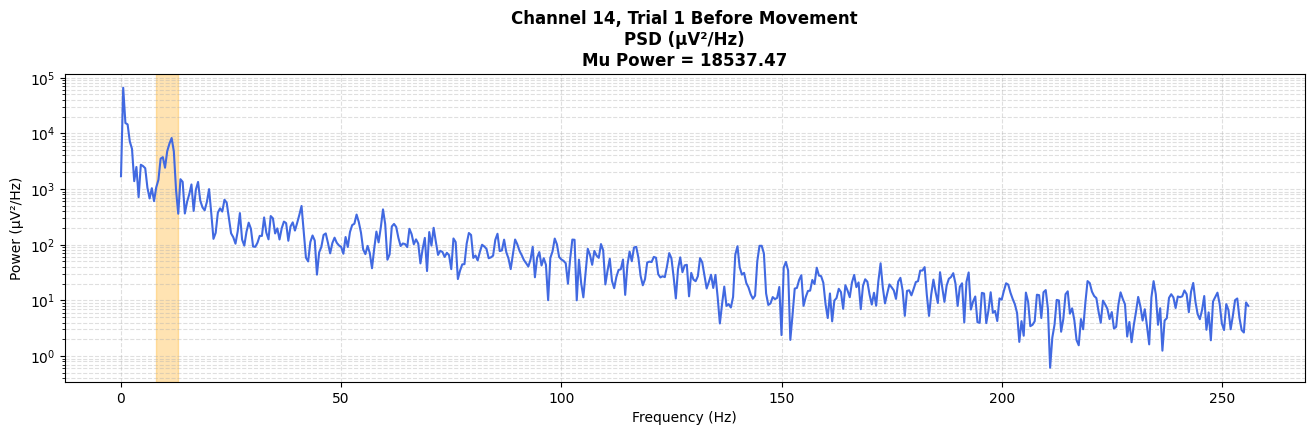

In [53]:
plt.figure(figsize=(16, 4))
plt.semilogy(during_f, during_Pxx, color='royalblue')
plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 14, Trial 1 Before Movement\nPSD (µV²/Hz)\nMu Power = {during_mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [40]:
after_f, after_Pxx = welch(after, fs=fs, nperseg=fs*2)

/var/folders/78/21sjthg97dz0k8kh6jfc0qfc0000gn/T/ipykernel_19839/2539626996.py:1: UserWarning: nperseg=1024 is greater than signal length max(len(x), len(y)) = 584, using nperseg = 584
  after_f, after_Pxx = welch(after, fs=fs, nperseg=fs*2)


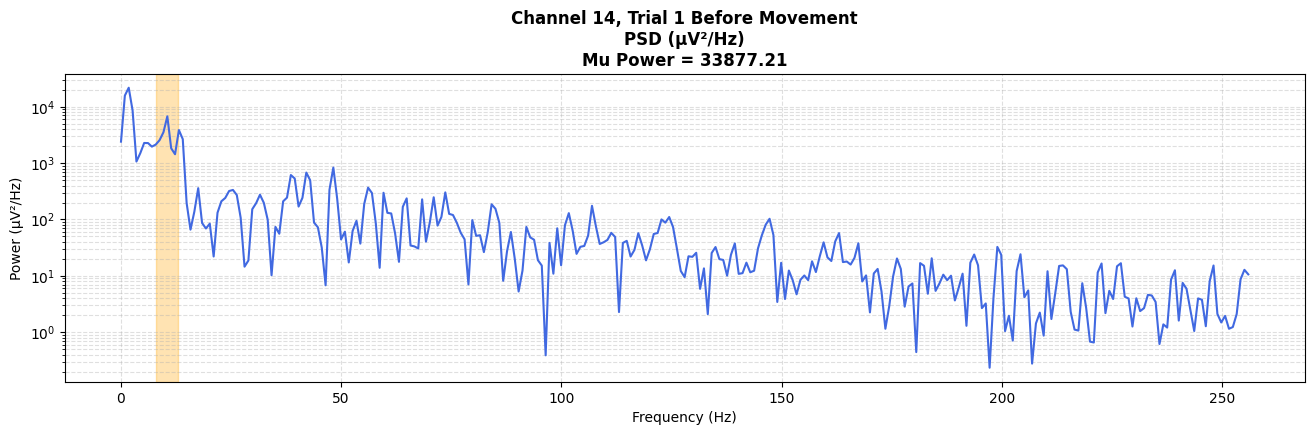

In [41]:
plt.figure(figsize=(16, 4))
plt.semilogy(after_f, after_Pxx, color='royalblue')
plt.axvspan(mu_band[0], mu_band[1], color='orange', alpha=0.3, label='Mu Band (8–13 Hz)')
plt.title(f'Channel 14, Trial 1 Before Movement\nPSD (µV²/Hz)\nMu Power = {mu_power:.2f}', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (µV²/Hz)')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [44]:
print(after_f.shape)
print(after_Pxx.shape)

(293,)
(293,)
